In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import mplcursors

In [2]:
df = yf.download('RELIANCE.NS')

[*********************100%***********************]  1 of 1 completed


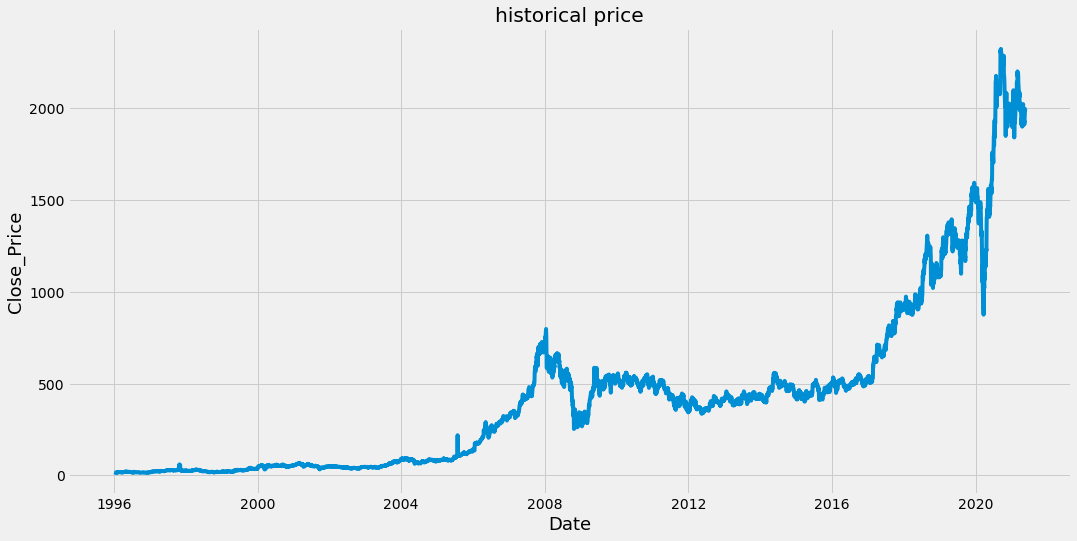

In [3]:
fig = plt.figure(figsize=(16,8))
plot = fig.add_subplot(111)

plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)

mplcursors.cursor(hover=True)
plt.show()

In [4]:
data = df.filter(['Close'])

In [5]:
current_data = np.array(data).reshape(-1,1).tolist() 

In [6]:
df = np.array(data).reshape(-1,1)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
train_data = scaled_df[0: , :]

x_train = []
y_train = []

for i in range(90, len(train_data)):
    x_train.append(train_data[i-90:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 90:
        print(x_train)
        print(y_train)
        print()

[array([0.00174118, 0.00168765, 0.0017395 , 0.00167594, 0.00162911,
       0.00135815, 0.00117082, 0.00100858, 0.00120093, 0.00113402,
       0.00106879, 0.0010805 , 0.00083295, 0.00066737, 0.00056534,
       0.00066235, 0.00041648, 0.0002258 , 0.        , 0.        ,
       0.00040477, 0.0009032 , 0.00077107, 0.00100858, 0.00167594,
       0.00224296, 0.00162409, 0.00174954, 0.00235168, 0.00278655,
       0.00228979, 0.00273637, 0.00274139, 0.00261595, 0.00247879,
       0.00255573, 0.00214929, 0.00214929, 0.00253399, 0.00245203,
       0.00246876, 0.00238178, 0.00241858, 0.00194523, 0.00198538,
       0.00191178, 0.00191178, 0.00216267, 0.0022279 , 0.00218943,
       0.00221285, 0.00259086, 0.00245872, 0.00245705, 0.00220783,
       0.00187331, 0.00144178, 0.00144178, 0.00191345, 0.00162744,
       0.0015873 , 0.00154381, 0.00178132, 0.00187164, 0.00177797,
       0.0018432 , 0.0018616 , 0.00192014, 0.00183651, 0.00183651,
       0.0019536 , 0.00196196, 0.00195861, 0.00188502, 0.0020

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

6290/6290 [==============================] - 398s 62ms/step - loss: 6.1983e-04


In [13]:
test_data = scaled_df[ -90: , :].tolist()
#test_data = [e[0] for e in test_data ]
x_test = []
y_test = []
for i in range(90 , 120):
    #print(i)
    x_test = (test_data[i-90:i ])
    #print(len(x_test))
    x_test = np.asarray(x_test)
    pred_data = model.predict(x_test.reshape(1 , x_test.shape[0], 1).tolist()) 
    
    y_test.append(pred_data[0][0])
    test_data.append(pred_data)
print(y_test)

C:\Users\DEV\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[0.84026605, 0.839092, 0.8366704, 0.8338339, 0.83093756, 0.8281237, 0.8254427, 0.82290107, 0.82048625, 0.81817746, 0.81595296, 0.8137925, 0.81168014, 0.80960387, 0.80755544, 0.8055297, 0.8035244, 0.80153817, 0.79957134, 0.7976238, 0.7956969, 0.7937906, 0.7919055, 0.7900413, 0.7881985, 0.78637624, 0.78457457, 0.78279275, 0.7810307, 0.77928776]


In [14]:
pred_next_30 = scaler.inverse_transform(np.asarray(y_test).reshape(-1,1))
pred_next_30

array([[1955.1398],
       [1952.4247],
       [1946.8243],
       [1940.2644],
       [1933.5662],
       [1927.0587],
       [1920.8584],
       [1914.9805],
       [1909.3959],
       [1904.0564],
       [1898.9119],
       [1893.9155],
       [1889.0303],
       [1884.2286],
       [1879.4913],
       [1874.8065],
       [1870.1688],
       [1865.5754],
       [1861.0267],
       [1856.5228],
       [1852.0665],
       [1847.6578],
       [1843.2983],
       [1838.9872],
       [1834.7252],
       [1830.511 ],
       [1826.3444],
       [1822.2236],
       [1818.1487],
       [1814.1178]], dtype=float32)

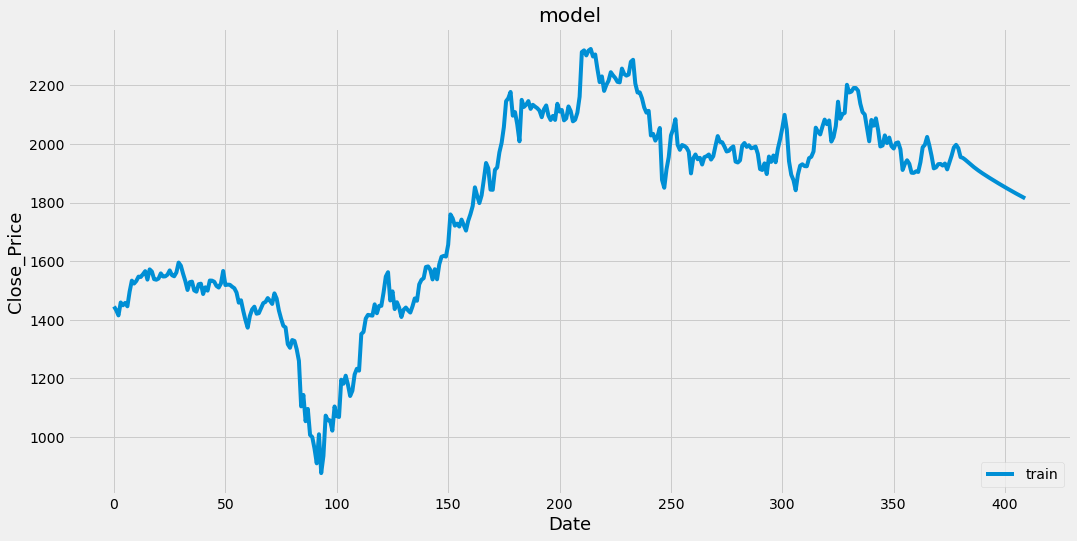

In [15]:
train = current_data[6000:]
train.extend(pred_next_30.tolist())


plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train)
plt.legend(['train'], loc = 'lower right')
plt.show()

## Immediate day Prediction 

In [16]:
next_day = data[-90:].values

In [17]:
next_day_scaled = scaler.transform(next_day)

In [18]:
next_day_pred = []
next_day_pred.append(next_day_scaled)
next_day_pred = np.array(next_day_pred)
next_day_pred = np.reshape(next_day_pred, (next_day_pred.shape[0], next_day_pred.shape[1], 1))

In [19]:
predicted_price = model.predict(next_day_pred)
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[1955.1398]]
